# Load Data and Display Samples

Set label names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Shape of images: (10000, 32, 32, 3)
Shape of labels: 10000


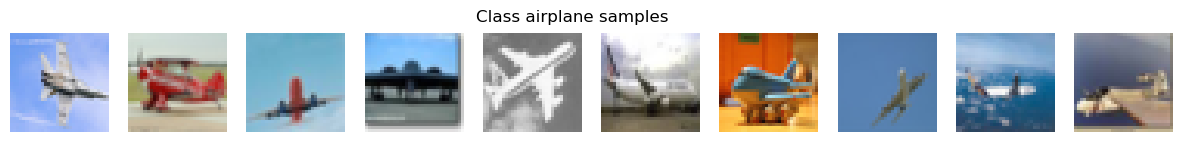

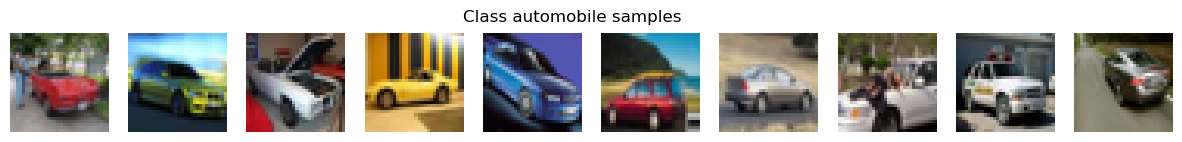

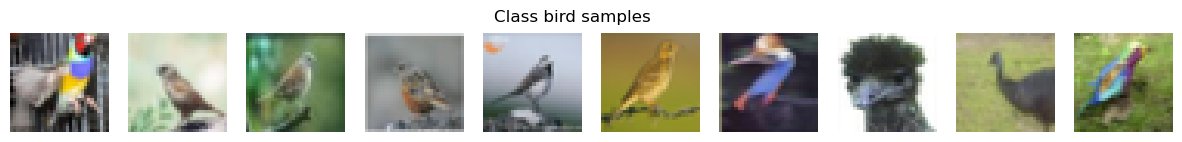

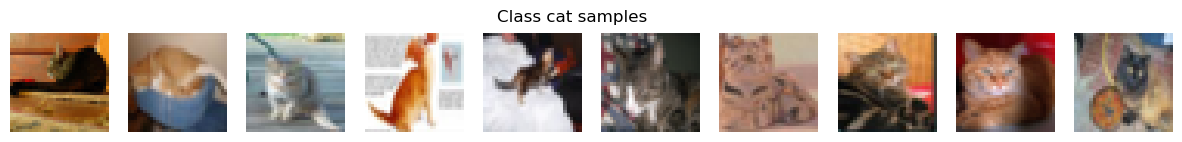

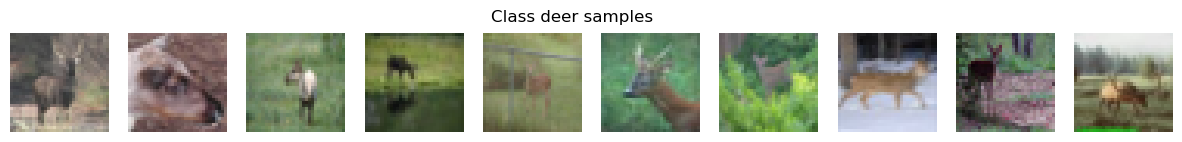

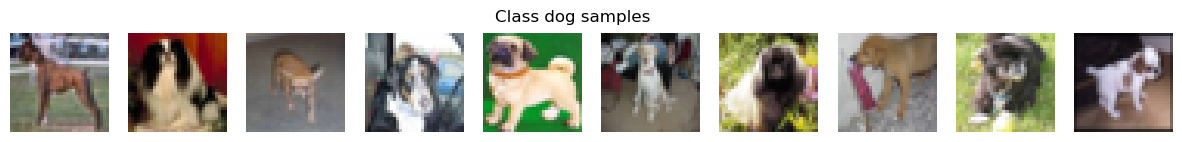

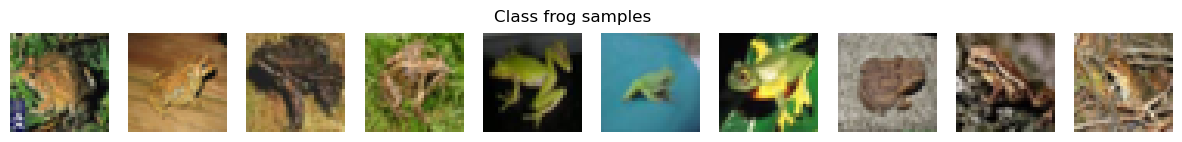

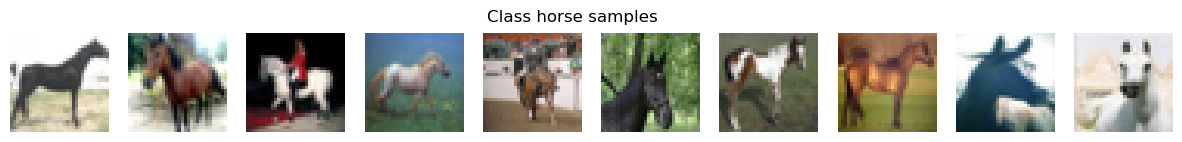

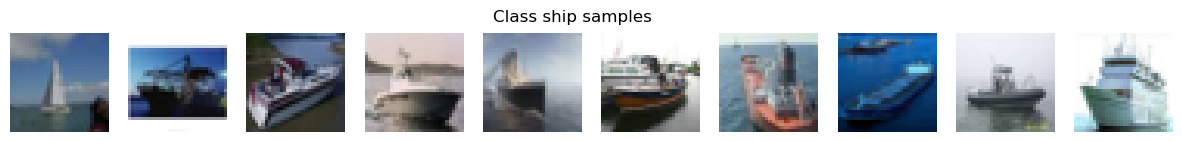

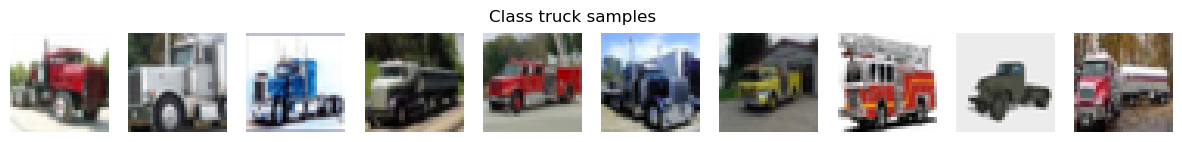

In [4]:
import os
# Assuming the notebook is in the 'notebooks' subdirectory of the root directory
# Change the current working directory to the root directory
os.chdir(os.path.join(os.getcwd(), '..'))

import numpy as np
import matplotlib.pyplot as plt
import random
from data.load_data import unpickle

file_names = [f"data/data_batch_{i}" for i in range(1, 6)]

# Load each batch and store the dictionaries in a list
dictionaries = [unpickle(file_name) for file_name in file_names]
meta_data = unpickle("data/batches.meta")

# Extract the label names and display
label_names = meta_data["label_names"]
print(f'Set label names: {label_names}')

# Load a single dictionary
set1 = dictionaries[0]

# Extracting data and labels from set1
data = set1['data']
labels = set1['labels']

# Reshaping the data to a more manageable format (10000, 32, 32, 3)
images = data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

# Verifying the shape of images and labels
print(f"Shape of images: {images.shape}")
print(f"Shape of labels: {len(labels)}")

# Number of classes and number of samples per class to display
num_classes = 10
samples_per_class = 10

for cls in range(num_classes):
    # Indices for images of this class
    idxs = [i for i, lbl in enumerate(labels) if lbl == cls]
    
    # Randomly select 10 indices
    random_idxs = random.sample(idxs, samples_per_class)
    
    # Plotting
    plt.figure(figsize=(15, 1.5))
    plt.suptitle(f"Class {label_names[cls]} samples")
    for i, idx in enumerate(random_idxs):
        plt.subplot(1, samples_per_class, i + 1)
        plt.imshow(images[idx].astype('uint8'))
        plt.axis('off')
    plt.show()
